Trying

In [31]:
# this cell is just made-up numbers. Don't use this cell.
g = 9.783 # m/s^2 at Bangkok
m_ball = 24e-3 # kg
r_ball = 4e-2 # m for standard squash ball
r_link = 17e-2 # m
m_link = 0.2 # kg

# calculate the moment of inertia of the system
I_ball = m_ball * r_ball**2
I_link = 1/3 * m_link * r_link**2

I_sys = 2*I_link + 2*I_ball
print(f"The moment of inertia of the system is {I_sys:.3f} kg m^2")

# total mass
m_sys = 2*m_link + 2*m_ball
print(f"The total mass of the system is {m_sys:.3f} kg")


The moment of inertia of the system is 0.004 kg m^2
The total mass of the system is 0.448 kg


Actual Calculations

In [32]:
import math

# calculate from solidorks CAD
g = 9.783 # m/s^2 at Bangkok
m_ball = 24e-3 # kg
r_ball = 4e-2 # m for standard squash ball
r_link = 17e-2 # m

m_sys = 321.40 * 1e-3 # kg
I_sys = 3696274.92 # g mm^2
I_sys = I_sys * 1e-9 # kg m^2

print(f"The moment of inertia of the system is {I_sys} kg m^2")


The moment of inertia of the system is 0.00369627492 kg m^2


In [33]:
# to reach the speed of 400 rpm
omega_f = 400 * 2 * math.pi / 60
KE_f = 1/2 * I_sys * omega_f**2
print(f"The kinetic energy at 400 rpm is {KE_f:.4f} J")
print(f"angular velocity at 400 rpm is {omega_f:.4f} rad/s")

# assume power is averagely constant
delt_t = 20 # s
P = KE_f / delt_t
print(f"The power required is {P:.4f} W")


The kinetic energy at 400 rpm is 3.2427 J
angular velocity at 400 rpm is 41.8879 rad/s
The power required is 0.1621 W


In [34]:
# to reach the speed of 400 rpm
omega_f = 400 * 2 * math.pi / 60
KE_f = 1/2 * I_sys * omega_f**2
print(f"The kinetic energy at 400 rpm is {KE_f:.8f} J")
print(f"angular velocity at 400 rpm is {omega_f:.8f} rad/s")
print()

# assume torque is averagely constant
delt_t = 20 # s
alpha = omega_f / delt_t
torque = I_sys * alpha
print(f"The torque required to reach 400 rpm in {delt_t:.8f} s is {torque:.8f} Nm")
power_avg = KE_f / delt_t
power_max = torque * omega_f
print(f"The average power required to reach 400 rpm in {delt_t:.8f} s is {power_avg:.8f} W")
print(f"The max power required to reach 400 rpm in 20 s {delt_t:.8f} {power_max:.8f} W")

SF = 3 # safety factor
print()
print(f"The torque should be at least {torque*SF:.8f} Nm")
print(f"The average power should be at least {power_avg*SF:.8f} W")
print(f"The max power should be at least {power_max*SF:.8f} W")

# print torque in kg*cm
print(f"The torque required to reach 400 rpm in {delt_t:.8f} s is {SF*torque*10:.8f} kg*cm")


The kinetic energy at 400 rpm is 3.24273522 J
angular velocity at 400 rpm is 41.88790205 rad/s

The torque required to reach 400 rpm in 20.00000000 s is 0.00774146 Nm
The average power required to reach 400 rpm in 20.00000000 s is 0.16213676 W
The max power required to reach 400 rpm in 20 s 20.00000000 0.32427352 W

The torque should be at least 0.02322438 Nm
The average power should be at least 0.48641028 W
The max power should be at least 0.97282057 W
The torque required to reach 400 rpm in 20.00000000 s is 0.23224380 kg*cm


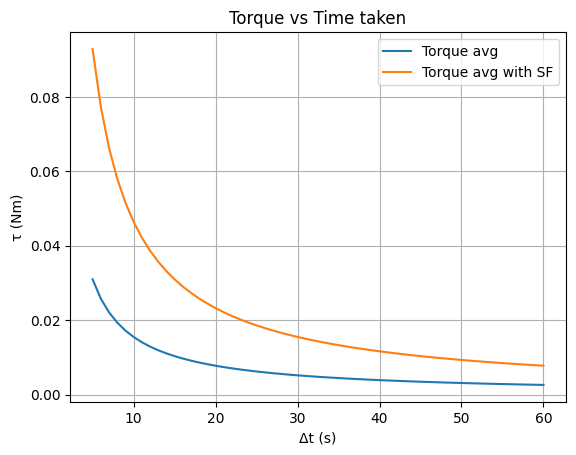

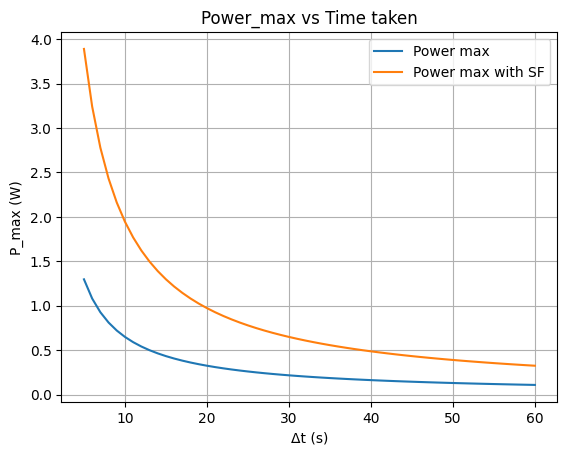

In [35]:
import numpy as np
import matplotlib.pyplot as plt

def torque_for_delt_t(omega_f, delt_t):
    torque = I_sys * omega_f / delt_t
    return torque

def power_max_for_delt_t(omega_f, delt_t):
    power_max = torque_for_delt_t(omega_f, delt_t) * omega_f
    return power_max

# plot torque vs delt_time from 10 to 60 s

SF = 3 # safety factor

delt_t_l = np.arange(5, 61, 1)
torque_l = [torque_for_delt_t(omega_f, delt_t) for delt_t in delt_t_l]
torque_SF_l = [torque_i * SF for torque_i in torque_l]

# plot torque and torque_SF vs delt_t in the same graph
plt.plot(delt_t_l, torque_l, label='Torque avg')
plt.plot(delt_t_l, torque_SF_l, label='Torque avg with SF')
plt.xlabel('Δt (s)')
plt.ylabel('τ (Nm)')
plt.title('Torque vs Time taken')
plt.legend()
plt.grid()
plt.show()

# plot power_max vs delt_time from 10 to 60 s
power_max_l = [power_max_for_delt_t(omega_f, delt_t) for delt_t in delt_t_l]
power_max_SF_l = [power_max_i * SF for power_max_i in power_max_l]

plt.plot(delt_t_l, power_max_l, label='Power max')
plt.plot(delt_t_l, power_max_SF_l, label='Power max with SF')
plt.xlabel('Δt (s)')
plt.ylabel('P_max (W)')
plt.title('Power_max vs Time taken')
plt.legend()
plt.grid()
plt.show()
